# UAS STKI - Klasifikasi Twitter

Nama Kelompok : 
1. Falah Hikamudin Arby - 18.01.53.0029
2. Dwiki Vio Setyadarma - 18.01.53.0011
3. Tata Redha Al Fath   - 18.01.53.0014

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /home/arby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import tweepy

api_key = 'CvqigY69okAvBCSU7m6N88Cqm'
api_secret_key = 'zyzIJzwCHWWp20Tx5qFq1Bl2hHHjo4ITBJ1j5z4RVUPGBZCvNb'
access_token = '1303853139787878400-2ax3I6QgLSs9ANKLC6MUm7Vz8ZY40x'
access_token_secret = 'cRUf05KQnMnD72pkuV8fRKeoKD6mWV0YX4LtmaXd91N1x'

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
#Mencari/Search Topik Pilkada di Twitter dan menghindari retweet serta kalimat tidak senonoh
cari_topik = 'pilkada'
hindari_retweet = '-RT'
hindari_kata = '-vcs'
query = cari_topik+' & '+hindari_retweet+' & '+hindari_kata
max_tweets = 100
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query, lang="en", include_rts='false').items(max_tweets)]

In [9]:
#Part-2: Sentiment Analysis Report

#Finding sentiment analysis (+ve, -ve and neutral)
hasilAnalisis = []

pos = 0
neg = 0
for tweet in searched_tweets:
    tweet_properties = {}
    tweet_properties['user'] = tweet.user.screen_name
    tweet_properties['tweet'] = tweet.text
    
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>=0:
       pos = pos +1
       tweet_properties['rating'] = "positif"
    else:
       neg = neg + 1
       tweet_properties['rating'] = "negatif"
    hasilAnalisis.append(tweet_properties)
print("Total Positive = ", pos)
print("Total Negative = ", neg)

Total Positive =  86
Total Negative =  14


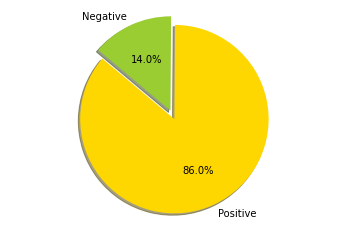

In [10]:
#Plotting sentiments
labels = 'Positive', 'Negative'
sizes = [pos, neg]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0 )  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [11]:
hasilAnalisis

[{'user': 'Griffith_Uni',
  'tweet': "In @jakpost, @Griffith_Health's @drdickybudiman is speaks on #COVID-19 in Indonesia. He says the daily infection ra… https://t.co/QA5pEj1MuQ",
  'rating': 'positif'},
 {'user': 'setiawan_ewin',
  'tweet': '@DeeOfGlory @CBIpictures @WatchmenID Pilkada be like : Excuse me?',
  'rating': 'negatif'},
 {'user': 'johandjayanto',
  'tweet': 'It was fun and challenging photoshoot during national holiday of Pilkada 2020! 😁\n.\n.\n#PacificPlace #afterphotoshoot… https://t.co/lhIeeRmQ7Z',
  'rating': 'positif'},
 {'user': 'Aleifuu',
  'tweet': '@nuicemedia So pre long holiday was about 14% \nThen dip lower due to low testing to 10%ish \nThen just before pilkad… https://t.co/mNEBkhAd4E',
  'rating': 'negatif'},
 {'user': 'EdwardAspinall',
  'tweet': 'In this article, we use data from 1489 local elections (pilkada) to see what they tell us about coalition patterns.… https://t.co/KkqYiiHPOO',
  'rating': 'positif'},
 {'user': 'EdwardAspinall',
  'tweet': 'New ar

In [12]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
pos = 0
neg = 0        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        user = each_dictionary['user']['screen_name']
        text = each_dictionary['text']
        
        analysis = TextBlob(text)
        if analysis.sentiment[0]>=0:
           pos = pos +1
           rating = each_dictionary['rating'] = "positif"
        else:
           neg = neg + 1
           rating = each_dictionary['rating'] = "negatif"
            
        
        my_demo_list.append({'user': str(user),
                             'text': str(text),
                             'rating': str(rating)
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['user', 'text','rating'
                                   ])


print("Total Positive = ", pos)
print("Total Negative = ", neg)
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data2.csv')

Total Positive =  86
Total Negative =  14


In [13]:
tweet_dataset.head()

,user,text,rating
0,Griffith_Uni,"In @jakpost, @Griffith_Health's @drdickybudima...",positif
1,setiawan_ewin,@DeeOfGlory @CBIpictures @WatchmenID Pilkada b...,negatif
2,johandjayanto,It was fun and challenging photoshoot during n...,positif
3,Aleifuu,@nuicemedia So pre long holiday was about 14% ...,negatif
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif


In [14]:
#part 4 - Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [15]:
tweet_dataset.head()

,user,text,rating
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif
2,johandjayanto,It was fun and challenging photoshoot during n...,positif
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif


In [16]:
#Cleaning Tweets
corpus = []
for i in range(0, 100):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

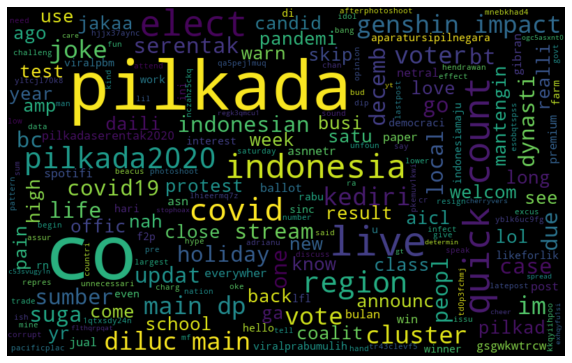

In [17]:
#Part-5: Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=100, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('live updat quick count pilkada serentak 2020 pilkadaserentak2020 pilkada2020 co gsgwkwtrcw', 2), ('speak covid 19 indonesia say daili infect ra co qa5pej1muq', 1), ('pilkada like excus', 1), ('fun challeng photoshoot nation holiday pilkada 2020 pacificplac afterphotoshoot co lhieermq7z', 1), ('pre long holiday 14 dip lower due low test 10 ish pilkad co mnebkhad4', 1), ('aicl use data 1489 local elect pilkada see tell us coalit pattern co kkqyiihpoo', 1), ('new aicl adrianu hendrawan coalit indonesian local elect pilkada co yblk6uc9fg', 1), ('love countri co 1qtxsdy24n', 1), ('one repres opinion resign elect begin co td0p3fchmj', 1), ('oke bud co tr43clevf5', 1)]


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

tweet_dataset.columns = ['user', 'text','rating']
tweet_dataset.head()

,user,text,rating
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif
2,johandjayanto,It was fun and challenging photoshoot during n...,positif
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif


# EDA

In [21]:
#  Shape of the dataset, and breakdown of the classes
print("Input data has {} rows and {} columns".format(len(tweet_dataset), len(tweet_dataset.columns)))
print("Out of {} rows, {} are Positif, {} are Negatif".format(len(tweet_dataset),len(tweet_dataset[tweet_dataset['rating']=='positif']),len(tweet_dataset[tweet_dataset['rating']=='negatif'])))


Input data has 100 rows and 3 columns
Out of 100 rows, 86 are Positif, 14 are Negatif


Number of null in label: 0
Number of null in text: 0


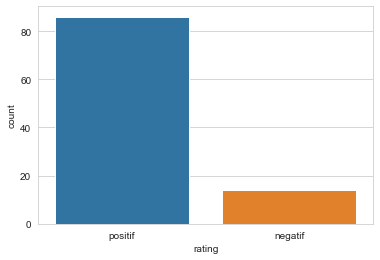

In [22]:
# Missing values in the dataset
print("Number of null in label: {}".format(tweet_dataset['rating'].isnull().sum()))
print("Number of null in text: {}".format(tweet_dataset['text'].isnull().sum()))
sns.countplot(x='rating', data=tweet_dataset);

In [23]:
tweet_positif = tweet_dataset[tweet_dataset['rating']=='positif']
tweet_negatif = tweet_dataset[tweet_dataset['rating']=='negatif']
#convert to list
positif_list= tweet_positif['text'].tolist()
negatif_list= tweet_negatif['text'].tolist()
filtered_positif = ("").join(positif_list) #convert the list into a string of positif
filtered_positif = filtered_positif.lower()
filtered_negatif = ("").join(negatif_list) #convert the list into a string of negatif
filtered_negatif = filtered_negatif.lower()

# Visualizing Word Clouds

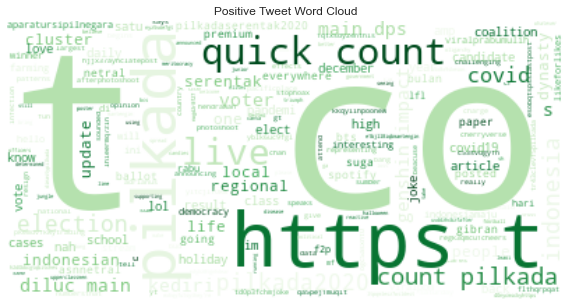

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweet Word Cloud")
plt.show()

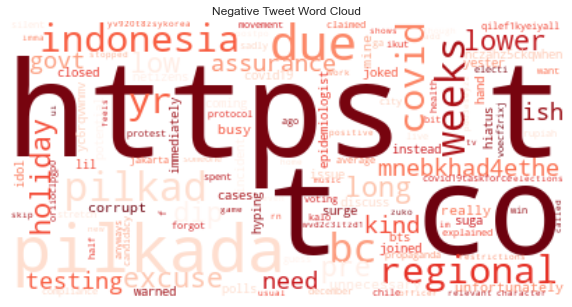

In [25]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweet Word Cloud")
plt.show()

# Preprocessing the Data

Cleaning the Text

In [26]:
import string
import re

In [27]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
tweet_dataset['cleaned_text'] = tweet_dataset['text'].apply(lambda x: clean_text(x))
tweet_dataset['label'] = tweet_dataset['rating'].map({'negatif':0, 'positif':1})

In [28]:
tweet_dataset.head()

,user,text,rating,cleaned_text,label
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0
2,johandjayanto,It was fun and challenging photoshoot during n...,positif,it was fun and challenging photoshoot during n...,1
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif,so pre long holiday was about then dip l...,0
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif,in this article we use data from local e...,1


Adding additional features - length of, and percentage of punctuations in the text

In [29]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
tweet_dataset['text_len'] = tweet_dataset['text'].apply(lambda x: len(x) - x.count(" "))
tweet_dataset['punct'] = tweet_dataset['text'].apply(lambda x: count_punct(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7
2,johandjayanto,It was fun and challenging photoshoot during n...,positif,it was fun and challenging photoshoot during n...,1,126,7.9
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif,so pre long holiday was about then dip l...,0,108,6.5
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif,in this article we use data from local e...,1,120,7.5


# Tokenization

In [30]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
tweet_dataset['tokens'] = tweet_dataset['cleaned_text'].apply(lambda x: tokenize_text(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct,tokens
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8,"[in, s, is, speaks, on, covid, in, indonesia, ..."
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7,"[pilkada, be, like, excuse, me]"
2,johandjayanto,It was fun and challenging photoshoot during n...,positif,it was fun and challenging photoshoot during n...,1,126,7.9,"[it, was, fun, and, challenging, photoshoot, d..."
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif,so pre long holiday was about then dip l...,0,108,6.5,"[so, pre, long, holiday, was, about, then, dip..."
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif,in this article we use data from local e...,1,120,7.5,"[in, this, article, we, use, data, from, local..."


# Lemmatization and Removing Stopwords

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [32]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /home/arby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
tweet_dataset['lemmatized_text'] = tweet_dataset['tokens'].apply(lambda x: lemmatize_text(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8,"[in, s, is, speaks, on, covid, in, indonesia, ...",speaks covid indonesia say daily infection ra ...
1,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7,"[pilkada, be, like, excuse, me]",pilkada like excuse
2,johandjayanto,It was fun and challenging photoshoot during n...,positif,it was fun and challenging photoshoot during n...,1,126,7.9,"[it, was, fun, and, challenging, photoshoot, d...",fun challenging photoshoot national holiday pi...
3,Aleifuu,So pre long holiday was about 14% \nThen dip ...,negatif,so pre long holiday was about then dip l...,0,108,6.5,"[so, pre, long, holiday, was, about, then, dip...",pre long holiday dip lower due low testing ish...
4,EdwardAspinall,"In this article, we use data from 1489 local e...",positif,in this article we use data from local e...,1,120,7.5,"[in, this, article, we, use, data, from, local...",article use data local election pilkada see te...


# Feature Extraction from Text

Bag-Of-Words Mode

In [34]:
X = tweet_dataset[['lemmatized_text', 'text_len', 'punct']]
y = tweet_dataset['label']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(30, 3)
(70,)
(30,)


In [36]:
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,...,55,56,57,58,59,60,61,62,63,64
0,101,7.9,0.0,0.000000,0.0,0.0,0.0,0.0,0.515607,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,80,6.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,94,10.6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531539
3,48,4.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,123,6.5,0.0,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Training different Classification models

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



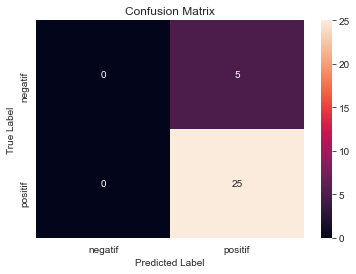

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



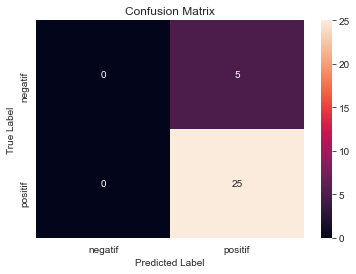

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



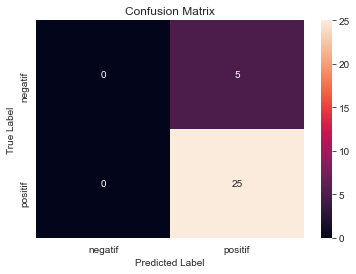

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.86      1.00      0.93        25

    accuracy                           0.87        30
   macro avg       0.93      0.60      0.63        30
weighted avg       0.89      0.87      0.83        30



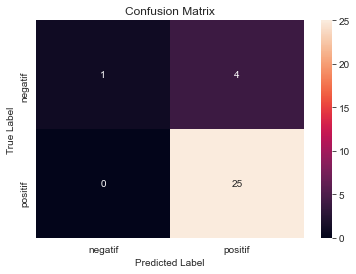

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      0.96      0.89        25

    accuracy                           0.80        30
   macro avg       0.41      0.48      0.44        30
weighted avg       0.69      0.80      0.74        30



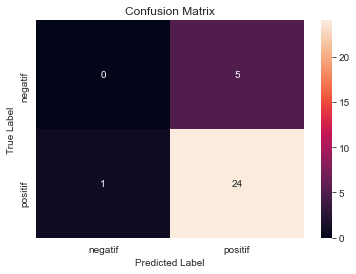

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.

In [43]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), RandomForestClassifier(n_estimators = 150), SVC(kernel = 'linear')]
names = ["Logistic Regression", "Random Forest", "SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")

Logistic Regression
 accuracy - 0.8571428571428571 
 precision - 0.869047619047619 
 recall - 0.9833333333333334 
 f1 - 0.9217948717948717 
Random Forest
 accuracy - 0.8571428571428571 
 precision - 0.869047619047619 
 recall - 1.0 
 f1 - 0.9217948717948717 
SVM
 accuracy - 0.9 
 precision - 0.9 
 recall - 1.0 
 f1 - 0.9461538461538461 
